# Image Recognition with Convolutional Neural Networks

This exercise challenges you to build an image recognition model using a convolutional neural network. You'll select an image dataset, then train a model for image classification, object detection, or image segmentation using convolutional neural networks.

**Tasks:**

1. **Dataset Selection:** Choose a dataset. Consider dataset size, complexity, and availability. Only public datasets are acceptable. Briefly describe your dataset.
2. **Data Preparation:** Prepare the data: resize images, augment data, and split into training, validation, and test sets.
3. **Model Selection:** Choose a neural network architecture. Justify your choice based on the dataset and task.
4. **Training:** Train your model on the training data, monitoring performance on the validation set.
5. **Evaluation:** Evaluate the model's performance on the test set using appropriate metrics (e.g., accuracy, precision, recall, F1-score, mAP, IoU).
6. **Results and Discussion:** Present results, analyze performance, and discuss limitations or areas for improvement.

**Dataset Examples:**

* **Classification:** CIFAR-10/100, MNIST
* **Object Detection:** Pascal VOC/COCO
* **Segmentation:** Cityscapes

**Deliverables:**

* Jupyter Notebook with code for data preparation, model training, and evaluation. The outputs of the different code cells should be visible. At the end of the notebook add a brief report summarizing your approach, results, and discussion.

### Dependencies

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/Users/cokestuyck/Documents/GitHub/EDEM_MDA2425/ALUMNOS/MIA/COKE_STUYCK/RN2_CNN/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Functions

In [2]:
def model_metrics(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)

    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

In [3]:
def model_predictions(model, test_images, test_labels):

    predictions = model.predict(test_images)

    predicted_labels = np.argmax(predictions, axis=1)

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    num_predictions_to_display = 25
    plt.figure(figsize=(12, 12))

    for i in range(num_predictions_to_display):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        image_to_display = test_images[i]
        image_to_display = image_to_display.reshape(28, 28)

        plt.imshow(image_to_display, cmap=plt.cm.binary)

        true_label = np.argmax(test_labels[i]) if test_labels.ndim == 2 else test_labels[i]
        predicted_label = predicted_labels[i]

        plt.xlabel(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")

        # Add color to the label if it's a misclassification
        if predicted_label != true_label:
            plt.gca().xaxis.label.set_color('red')
        else:
            plt.gca().xaxis.label.set_color('black')

    plt.tight_layout()
    plt.show()

    cm = confusion_matrix(np.argmax(test_labels, axis=1) if test_labels.ndim == 2 else test_labels, predicted_labels)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='binary', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(np.argmax(test_labels, axis=1) if test_labels.ndim == 2 else test_labels, predicted_labels, target_names=class_names))

## 1. Dataset description, download and exploration

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

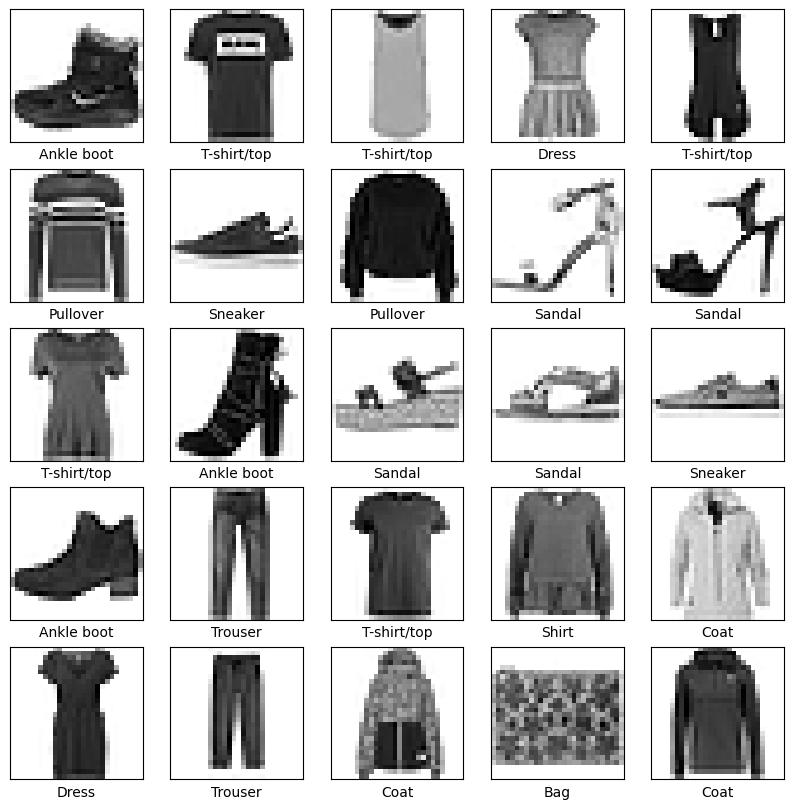

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

## 2. Data preparation and augmentation

In [7]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add a channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

print("Train Images Shape:", train_images.shape)
print("Validation Images Shape:", val_images.shape)
print("Test Images Shape:", test_images.shape)

Train Images Shape: (48000, 28, 28, 1)
Validation Images Shape: (12000, 28, 28, 1)
Test Images Shape: (10000, 28, 28, 1)


- **Normalization:** Pixel values / 255 = [0-1] (generally better for neural networks).
  
- **Channel Dimension:** Expected dimension, but Fashion-MNIST images are grayscale, so they have only one channel. We add this dimension using reshape.
  
- **One-Hot Encoding:** Optional, especially when using categorical_crossentropy as loss function.

In [8]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)

## 3. Model selection

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

/Users/cokestuyck/Documents/GitHub/EDEM_MDA2425/ALUMNOS/MIA/COKE_STUYCK/RN2_CNN/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training

In [10]:
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
        epochs=10,
        validation_data=(val_images, val_labels))

Epoch 1/10


/Users/cokestuyck/Documents/GitHub/EDEM_MDA2425/ALUMNOS/MIA/COKE_STUYCK/RN2_CNN/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6074 - loss: 1.0688 - val_accuracy: 0.7887 - val_loss: 0.5330
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7607 - loss: 0.6356 - val_accuracy: 0.8298 - val_loss: 0.4488
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7923 - loss: 0.5582 - val_accuracy: 0.8464 - val_loss: 0.4073
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8089 - loss: 0.5095 - val_accuracy: 0.8596 - val_loss: 0.3782
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8204 - loss: 0.4824 - val_accuracy: 0.8702 - val_loss: 0.3474
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8330 - loss: 0.4513 - val_accuracy: 0.8748 - val_loss: 0.3380
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8353 - loss: 0.4435 - val_accuracy: 0.8785 - val_loss: 0.3337
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8424 - loss: 0.4284 - val

## 5. Evaluation on the test set

In [11]:
model_metrics(model, test_images, test_labels)

Test Loss: 0.33463209867477417
Test Accuracy: 0.8812000155448914


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


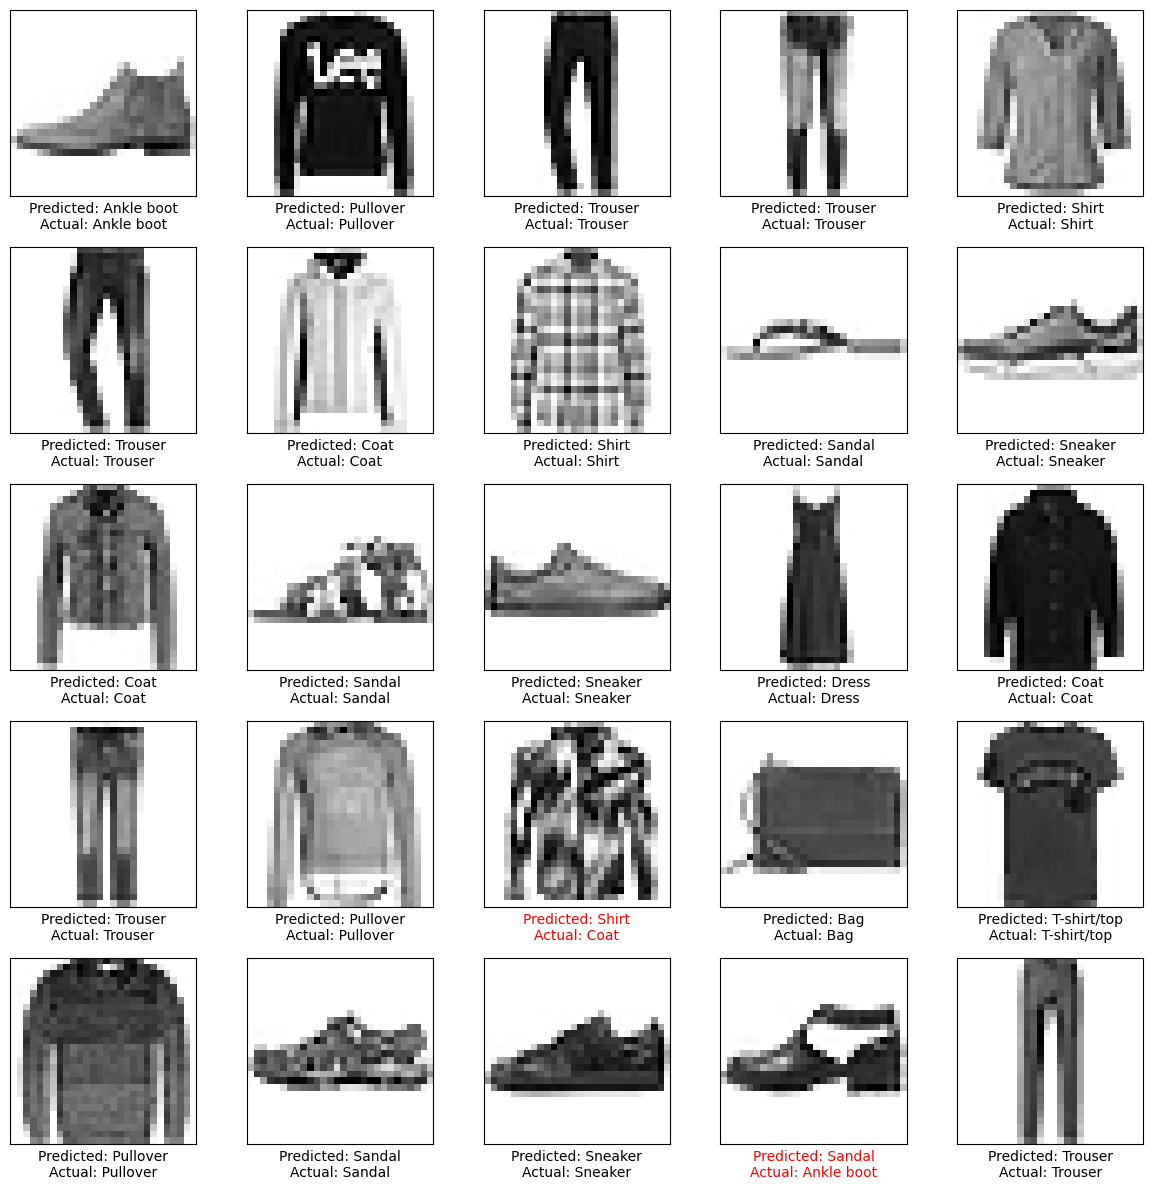

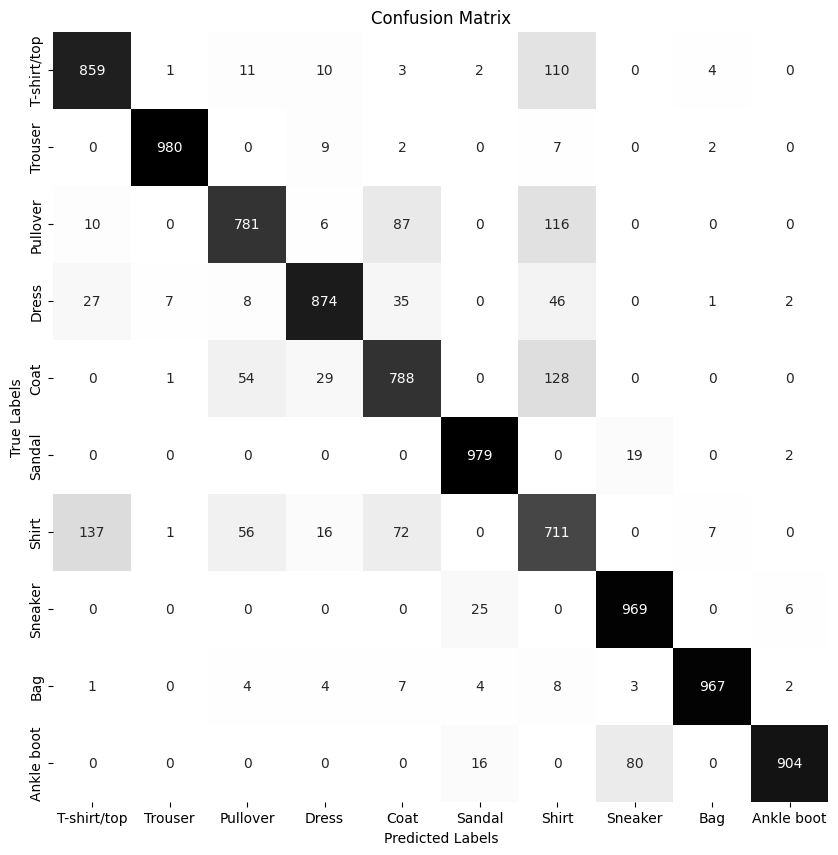

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.78      0.82      1000
       Dress       0.92      0.87      0.90      1000
        Coat       0.79      0.79      0.79      1000
      Sandal       0.95      0.98      0.97      1000
       Shirt       0.63      0.71      0.67      1000
     Sneaker       0.90      0.97      0.94      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.99      0.90      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [12]:
model_predictions(model, test_images, test_labels)

## 6. Results and discussion

Trouser, Sandal, Sneaker, Bag, and Ankle boot generally have high precision, recall, and F1-scores (around 0.90 or higher). This indicates the model is very good at classifying these items.

Shirt stands out as the class with the lowest performance (F1-score of 0.64).  This suggests the model struggles most with classifying shirts.


### Data Agmentation for Shirts

In [13]:
# 1. Separate Shirt Images
shirt_indices_train = np.where(np.argmax(train_labels, axis=1) == 6)[0]  # Assuming 'Shirt' is class 6 (check your class indices)
shirt_images_train = train_images[shirt_indices_train]
shirt_labels_train = train_labels[shirt_indices_train]

# 2. Create a Separate Data Generator for Shirts (More Aggressive Augmentation)
shirt_datagen = ImageDataGenerator(
    rotation_range=20,  # Increased rotation
    width_shift_range=0.2,  # Increased shift
    height_shift_range=0.2,  # Increased shift
    shear_range=0.2,      # Increased shear
    zoom_range=0.2,       # Increased zoom
    horizontal_flip=True, # You might want to keep horizontal flips for shirts
    fill_mode='nearest'
)

shirt_datagen.fit(shirt_images_train)

# 3. Combine Augmented Shirt Data with Original Training Data
# Create a generator that yields both the augmented shirts and the original data
def combined_generator(original_images, original_labels, shirt_images, shirt_labels, shirt_datagen, batch_size):
    while True:
        # Yield augmented shirts
        shirt_batches = shirt_datagen.flow(shirt_images, shirt_labels, batch_size=batch_size // 2) # Half the batch size for shirts
        yield next(shirt_batches)

        # Yield a batch from the original training data
        original_indices = np.random.randint(0, original_images.shape[0], batch_size // 2) # other half for the rest
        original_batch = original_images[original_indices]
        original_label_batch = original_labels[original_indices]
        yield (original_batch, original_label_batch)

# 4. Create the Combined Generator
combined_gen = combined_generator(train_images, train_labels, shirt_images_train, shirt_labels_train, shirt_datagen, batch_size=32)

# 5. Train the Model (Using the Combined Generator)
model.fit(combined_gen,
          steps_per_epoch=len(train_images) // 32, # steps per epoch needs to be adjusted.
          epochs=10,  # Adjust as needed
          validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8931 - loss: 0.3129 - val_accuracy: 0.8788 - val_loss: 0.3312
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9260 - loss: 0.2120 - val_accuracy: 0.8849 - val_loss: 0.3136
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9295 - loss: 0.1899 - val_accuracy: 0.8866 - val_loss: 0.3051
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9373 - loss: 0.1803 - val_accuracy: 0.8852 - val_loss: 0.3138
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9379 - loss: 0.1741 - val_accuracy: 0.8887 - val_loss: 0.2974
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9377 - loss: 0.1679 - val_accuracy: 0.8874 - val_loss: 0.3121
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9430 - loss: 0.1591 - val_accuracy: 0.8928 - val_loss: 0.2908
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9444 - loss: 0.1625 - 

In [14]:
model_metrics(model, test_images, test_labels)

Test Loss: 0.30001991987228394
Test Accuracy: 0.8960999846458435


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


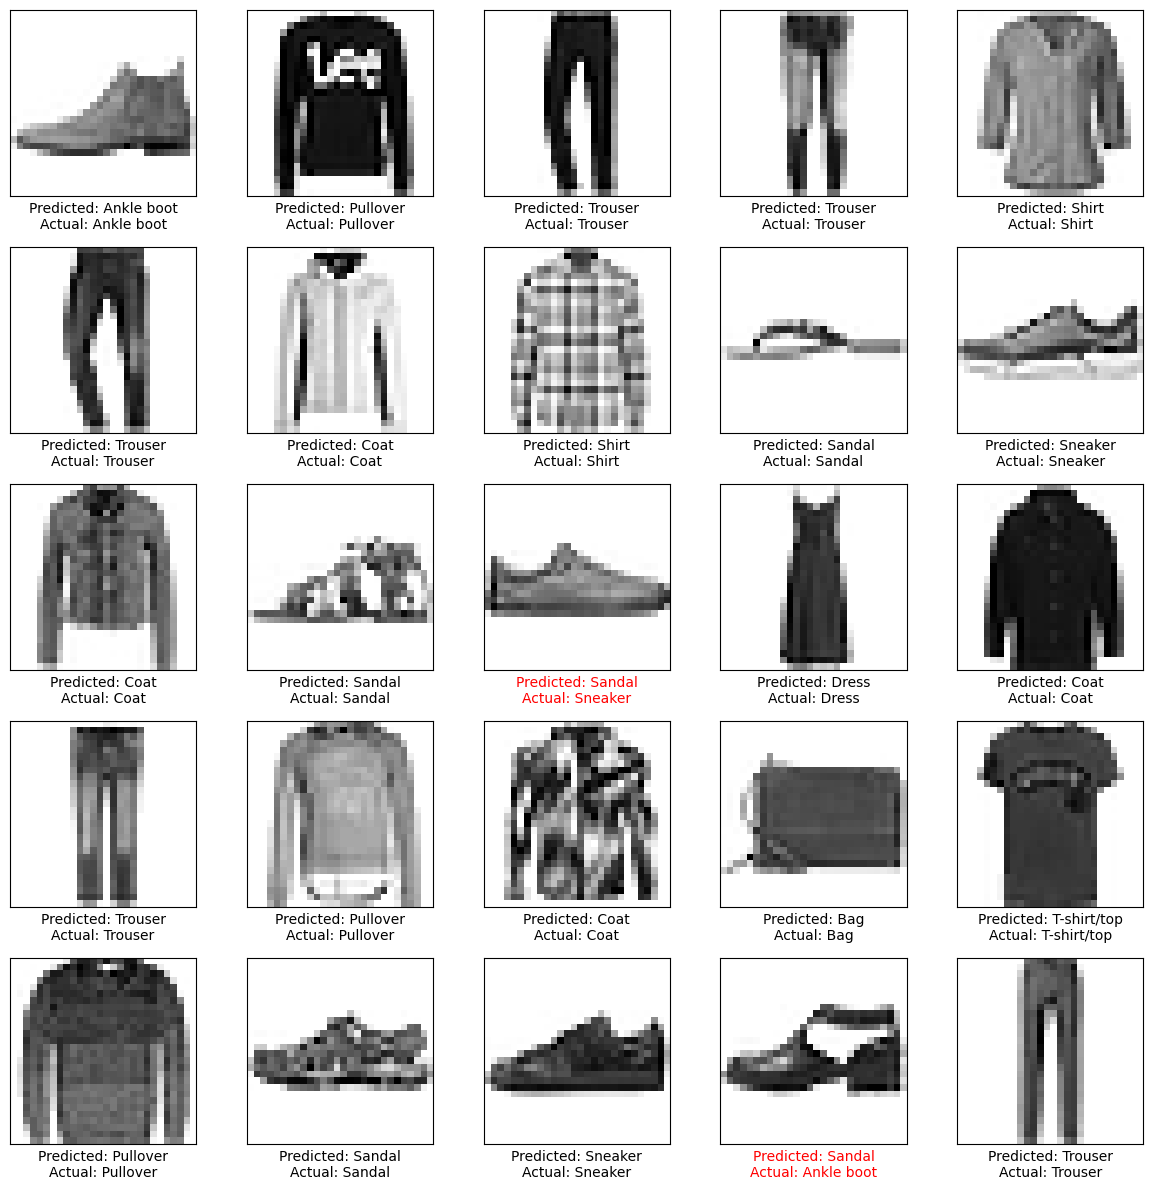

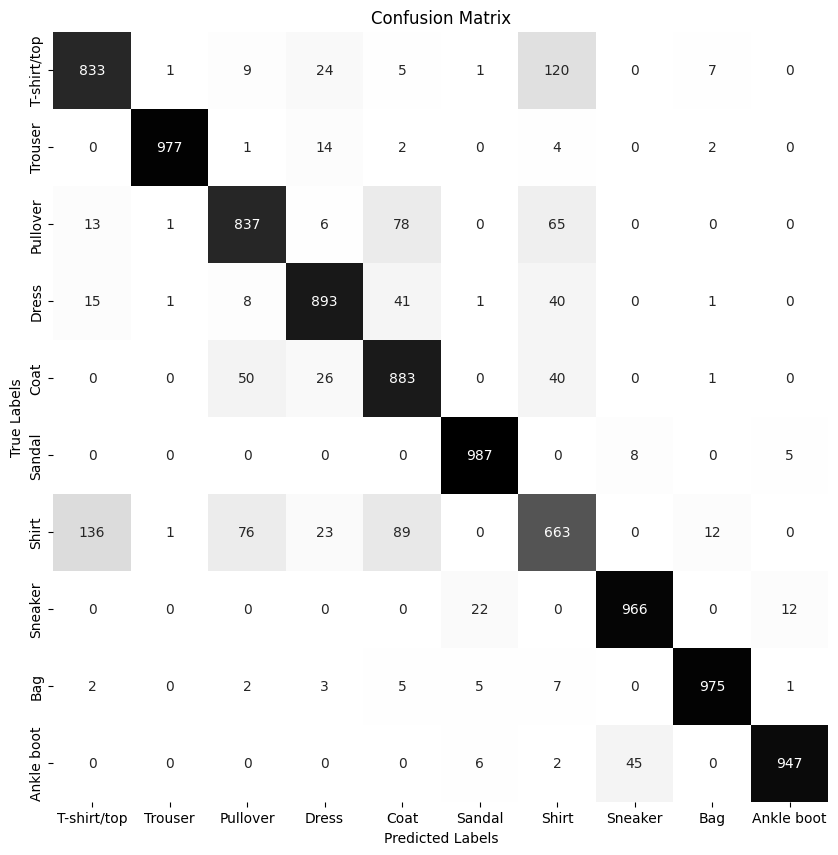

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.83      0.83      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.84      0.84      1000
       Dress       0.90      0.89      0.90      1000
        Coat       0.80      0.88      0.84      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.70      0.66      0.68      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [15]:
model_predictions(model, test_images, test_labels)

### Deeper Network

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),  # Padding added
    tf.keras.layers.BatchNormalization(),  # Batch Normalization added
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Padding added
    tf.keras.layers.BatchNormalization(),  # Batch Normalization added
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout added

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Padding added
    tf.keras.layers.BatchNormalization(),  # Batch Normalization added
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Padding added
    tf.keras.layers.BatchNormalization(),  # Batch Normalization added
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),  # Increased dropout

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Padding added
    tf.keras.layers.BatchNormalization(),  # Batch Normalization added
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Padding added
    tf.keras.layers.BatchNormalization(),  # Batch Normalization added
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),  # Increased dropout

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization added
    tf.keras.layers.Dropout(0.5),  # Increased dropout
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# ... (rest of your training and evaluation code, including data augmentation)

/Users/cokestuyck/Documents/GitHub/EDEM_MDA2425/ALUMNOS/MIA/COKE_STUYCK/RN2_CNN/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 885,738 (3.38 MB)

 Trainable params: 883,818 (3.37 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [17]:
# 5. Train the Model (Using the Combined Generator)
model.fit(combined_gen,
        steps_per_epoch=len(train_images) // 32, # steps per epoch needs to be adjusted.
        epochs=10,  # Adjust as needed
        validation_data=(val_images, val_labels))

Epoch 1/10


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6068 - loss: 1.2855 - val_accuracy: 0.7956 - val_loss: 0.5648
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.8774 - loss: 0.3760 - val_accuracy: 0.7797 - val_loss: 0.5536
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9027 - loss: 0.2949 - val_accuracy: 0.7894 - val_loss: 0.5741
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9091 - loss: 0.2649 - val_accuracy: 0.7685 - val_loss: 0.5755
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.9137 - loss: 0.2571 - val_accuracy: 0.7937 - val_loss: 0.5528
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9204 - loss: 0.2460 - val_accuracy: 0.8649 - val_loss: 0.3717
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9257 - loss: 0.2243 - val_accuracy: 0.8696 - val_loss: 0.3508
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.9237 - loss: 0.22

In [18]:
model_metrics(model, test_images, test_labels)

Test Loss: 0.424967885017395
Test Accuracy: 0.8410999774932861


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


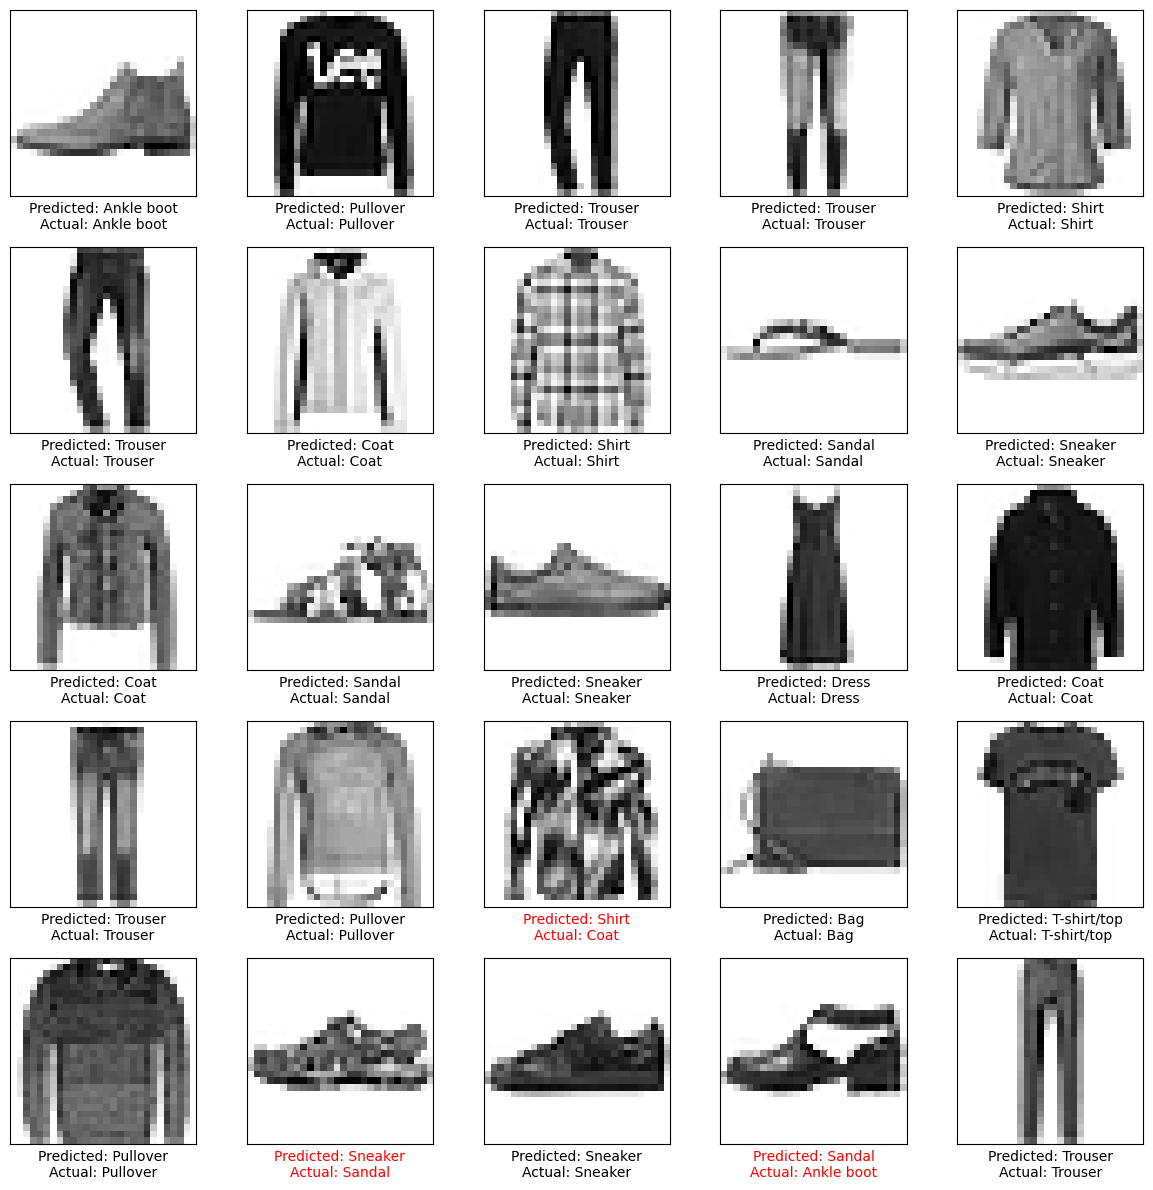

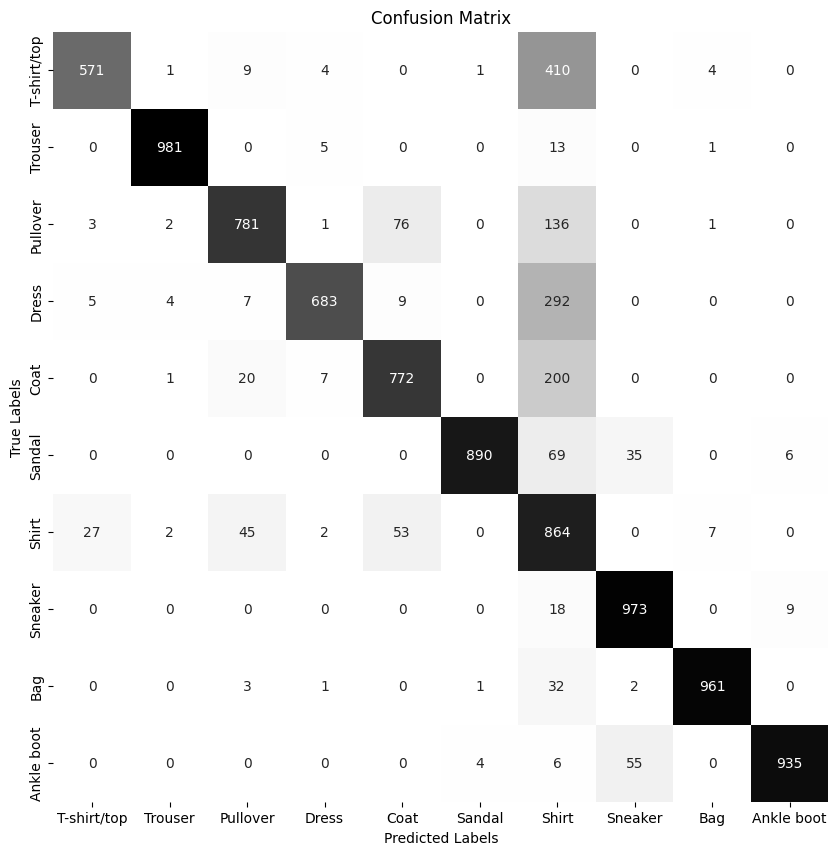

              precision    recall  f1-score   support

 T-shirt/top       0.94      0.57      0.71      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.78      0.84      1000
       Dress       0.97      0.68      0.80      1000
        Coat       0.85      0.77      0.81      1000
      Sandal       0.99      0.89      0.94      1000
       Shirt       0.42      0.86      0.57      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.99      0.96      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.84     10000
   macro avg       0.90      0.84      0.85     10000
weighted avg       0.90      0.84      0.85     10000



In [19]:
model_predictions(model, test_images, test_labels)